In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### TASK 1

In [49]:
# loading the dataset


# Load the dataset with proper delimiter and encoding
file_path = 'earnings.csv'
df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')

# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
       id      base   bonus  overtime_pay    other  sector  section_07  sex  \
0  192064  26651.53     0.0          0.00     0.00       1           3    2   
1   25495  40168.50  1500.0          0.00  3414.32       1           2    1   
2  142164  20134.80     0.0          0.00  1700.41       1           2    2   
3  198034  16475.00     0.0          0.00  1305.00       1           2    2   
4  144990  34797.60     0.0       1893.35  3118.73       1           2    2   

   education  contract  age  duration_total  duration_entity  \
0          4         1   49           33.03             7.06   
1          1         1   36           10.07             6.01   
2          4         1   52           28.08            19.05   
3          5         1   55           35.07            11.01   
4          2         1   50           27.00            19.01   

   duration_nominal  duration_overtime  
0           1524.15                0.0  
1           1562.40          

In [50]:

# Generate descriptive statistics for quantitative variables
quantitative_cols = ['base', 'bonus', 'overtime_pay', 'other', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
print("Descriptive statistics for quantitative variables:")
print(df[quantitative_cols].describe())

# Generate frequency tables for qualitative variables
qualitative_cols = ['sector', 'section_07', 'sex', 'education', 'contract']
for col in qualitative_cols:
    print(f"\nFrequency table for {col}:")
    print(df[col].value_counts())


Descriptive statistics for quantitative variables:
                base          bonus   overtime_pay         other  \
count   11000.000000   11000.000000   11000.000000  11000.000000   
mean    33376.738065    2128.486176    1679.273923   2477.625815   
std     19276.551638    4966.444726    5407.964344   3715.419120   
min        10.000000       0.000000       0.000000      0.000000   
25%     20995.115000       0.000000       0.000000      0.000000   
50%     31341.245000     620.000000       0.000000   2141.820000   
75%     41348.290000    2940.717500    1139.330000   3497.430000   
max    241624.390000  258061.000000  228110.340000  88555.760000   

                age  duration_total  duration_entity  duration_nominal  \
count  11000.000000     11000.00000     11000.000000      11000.000000   
mean      42.470182        18.56708        11.401382       1301.307435   
std       10.012140        10.99695         9.322181        540.189234   
min       19.000000         0.01000     

In [55]:
# Check for missing data
print("\nMissing data check:")
print(df.isnull().sum())

# Display data types
print("\nData types:")
print(df.dtypes)

# Display number of unique values for each column
print("\nUnique values per column:")
print(df.nunique())


Missing data check:
id                   0
base                 0
bonus                0
overtime_pay         0
other                0
sector               0
section_07           0
sex                  0
education            0
contract             0
age                  0
duration_total       0
duration_entity      0
duration_nominal     0
duration_overtime    0
dtype: int64

Data types:
id                     int64
base                 float64
bonus                float64
overtime_pay         float64
other                float64
sector                 int64
section_07             int64
sex                    int64
education              int64
contract               int64
age                    int64
duration_total       float64
duration_entity      float64
duration_nominal     float64
duration_overtime    float64
dtype: object

Unique values per column:
id                   11000
base                 10677
bonus                 3833
overtime_pay          3629
other                 80

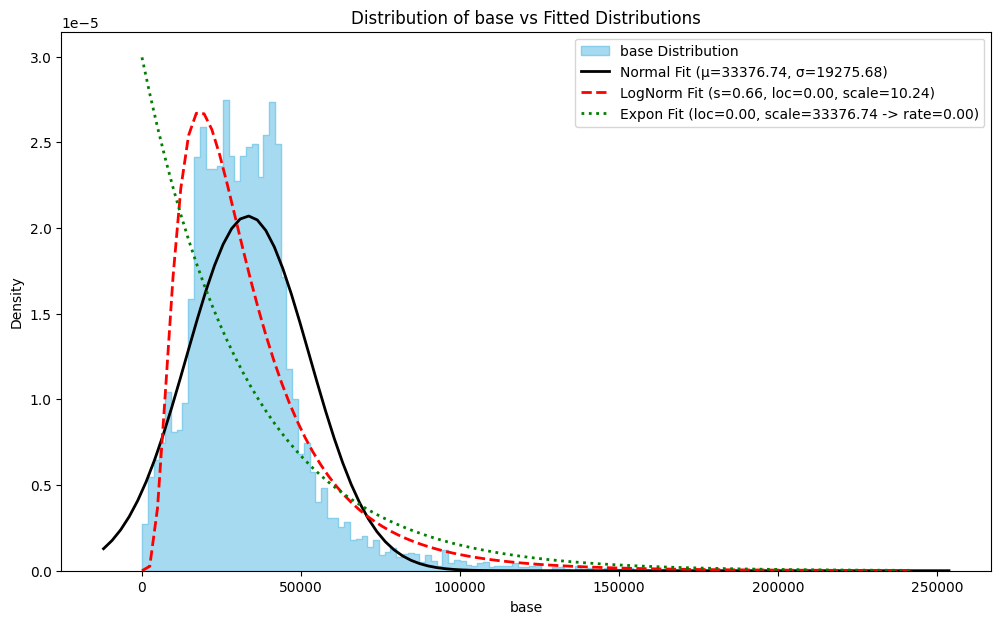

Discussion for base:
  Data Mean: 33376.74, Data Std Dev: 19276.55
  Skewness: 2.12, Kurtosis: 9.97
  Normal Fit: Mean (μ)=33376.74, Std Dev (σ)=19275.68
  LogNormal Fit: Shape (s)=0.66, Loc=0.00, Scale (exp(mu))=28073.07 (mu_log=10.24, sigma_log=0.66)
  Exponential Fit: Loc=0.00, Scale (1/λ)=33376.74 (Rate (λ)=0.00)
  Observations: Compare the histogram to Normal, Log-Normal, and Exponential distributions. Note skewness, presence of zeros/negatives, and how well each curve fits.
----------------------------------------------------------------------


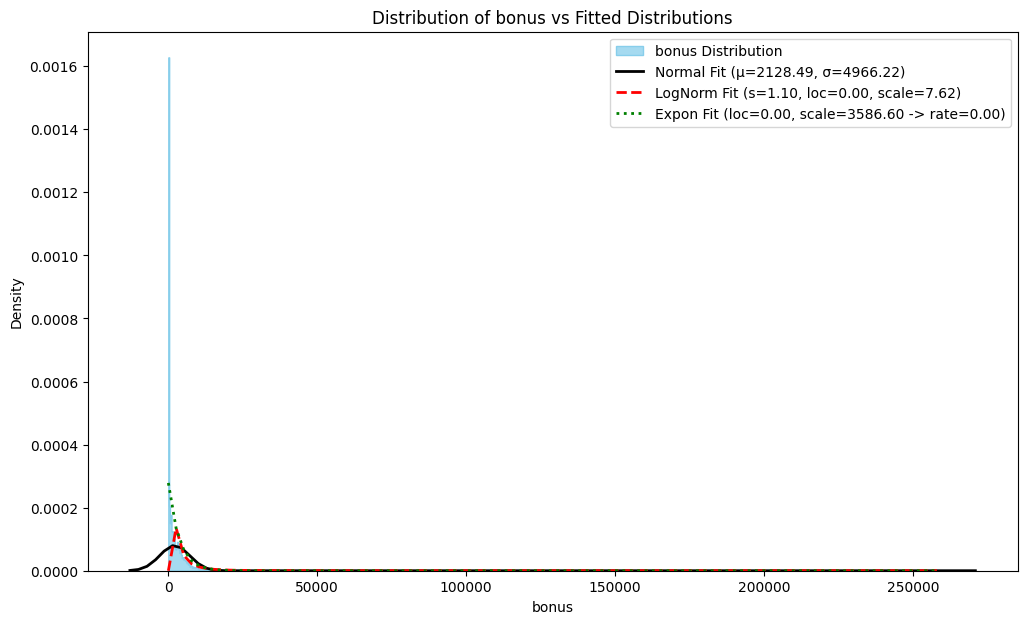

Discussion for bonus:
  Data Mean: 2128.49, Data Std Dev: 4966.44
  Skewness: 17.95, Kurtosis: 710.16
  Normal Fit: Mean (μ)=2128.49, Std Dev (σ)=4966.22
  LogNormal Fit: Shape (s)=1.10, Loc=0.00, Scale (exp(mu))=2032.33 (mu_log=7.62, sigma_log=1.10)
  Exponential Fit: Loc=0.00, Scale (1/λ)=3586.60 (Rate (λ)=0.00)
  Observations: Compare the histogram to Normal, Log-Normal, and Exponential distributions. Note skewness, presence of zeros/negatives, and how well each curve fits.
----------------------------------------------------------------------


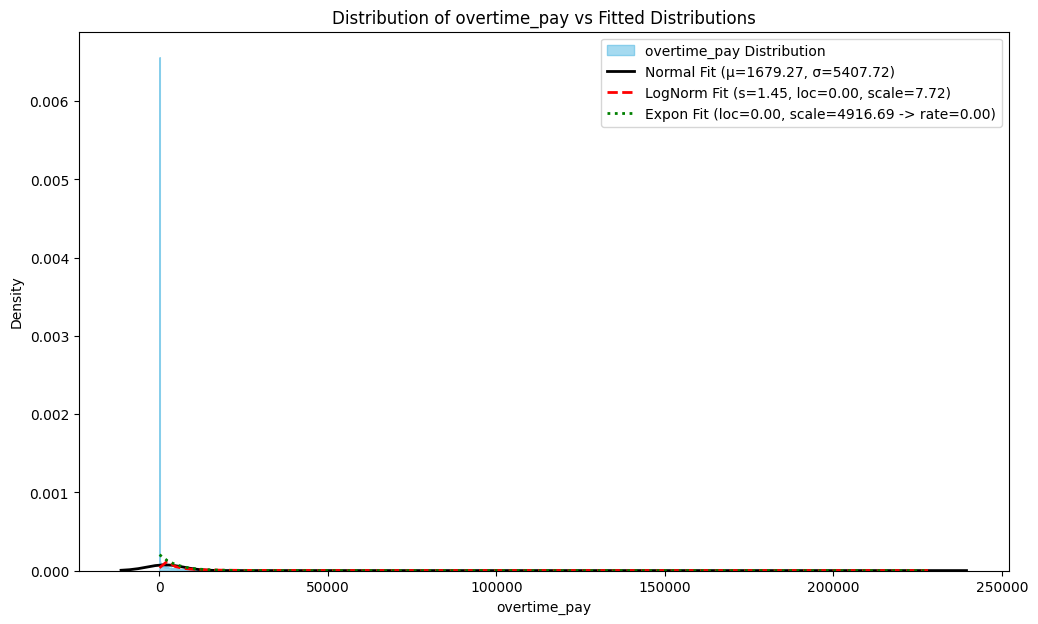

Discussion for overtime_pay:
  Data Mean: 1679.27, Data Std Dev: 5407.96
  Skewness: 15.16, Kurtosis: 440.13
  Normal Fit: Mean (μ)=1679.27, Std Dev (σ)=5407.72
  LogNormal Fit: Shape (s)=1.45, Loc=0.00, Scale (exp(mu))=2262.42 (mu_log=7.72, sigma_log=1.45)
  Exponential Fit: Loc=0.00, Scale (1/λ)=4916.69 (Rate (λ)=0.00)
  Observations: Compare the histogram to Normal, Log-Normal, and Exponential distributions. Note skewness, presence of zeros/negatives, and how well each curve fits.
----------------------------------------------------------------------


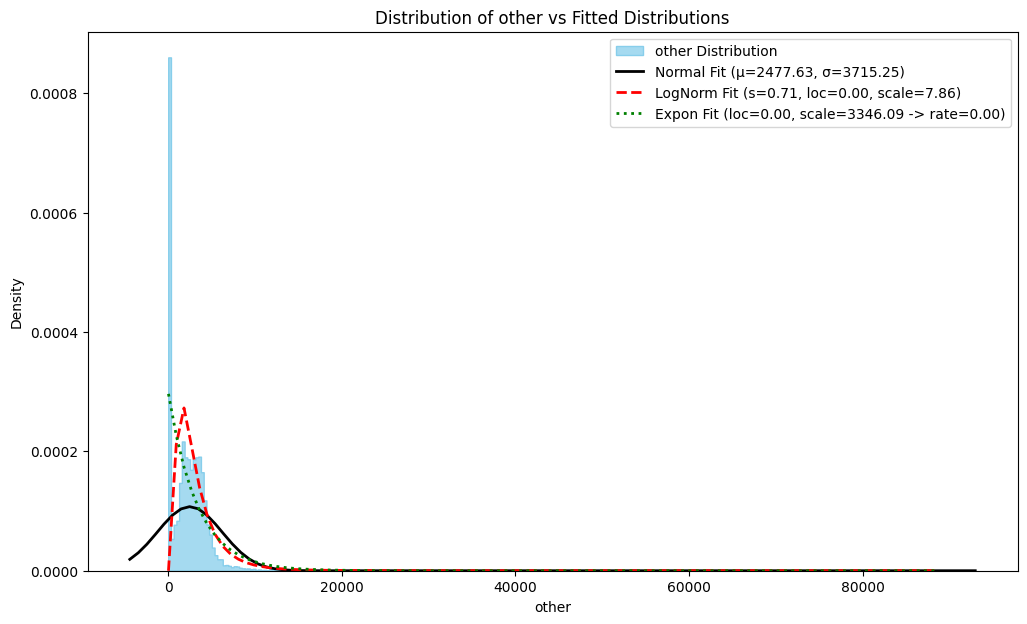

Discussion for other:
  Data Mean: 2477.63, Data Std Dev: 3715.42
  Skewness: 8.82, Kurtosis: 119.62
  Normal Fit: Mean (μ)=2477.63, Std Dev (σ)=3715.25
  LogNormal Fit: Shape (s)=0.71, Loc=0.00, Scale (exp(mu))=2592.78 (mu_log=7.86, sigma_log=0.71)
  Exponential Fit: Loc=0.00, Scale (1/λ)=3346.09 (Rate (λ)=0.00)
  Observations: Compare the histogram to Normal, Log-Normal, and Exponential distributions. Note skewness, presence of zeros/negatives, and how well each curve fits.
----------------------------------------------------------------------


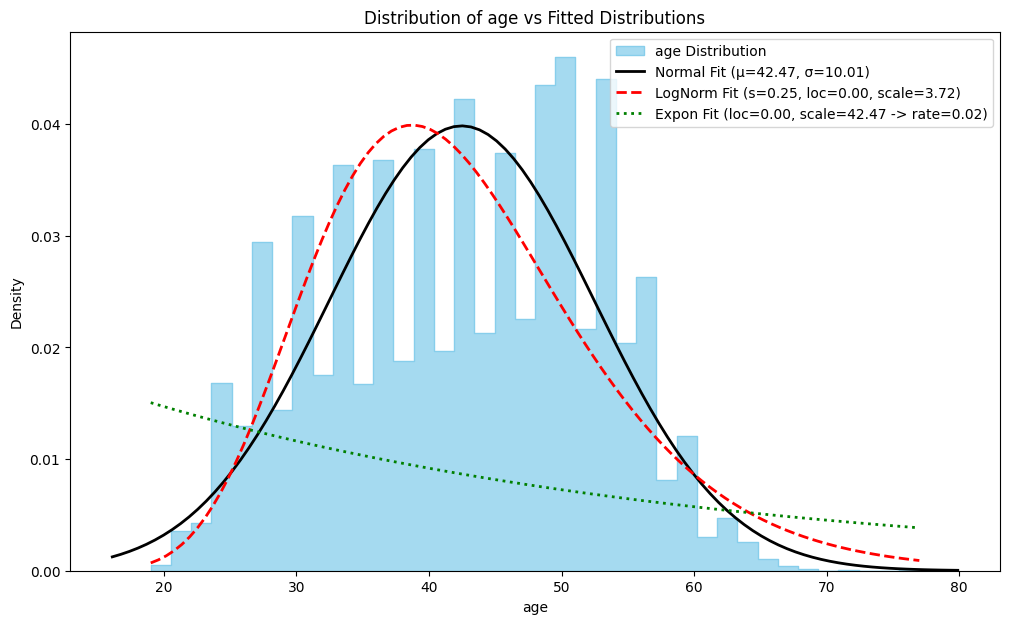

Discussion for age:
  Data Mean: 42.47, Data Std Dev: 10.01
  Skewness: -0.08, Kurtosis: -0.91
  Normal Fit: Mean (μ)=42.47, Std Dev (σ)=10.01
  LogNormal Fit: Shape (s)=0.25, Loc=0.00, Scale (exp(mu))=41.22 (mu_log=3.72, sigma_log=0.25)
  Exponential Fit: Loc=0.00, Scale (1/λ)=42.47 (Rate (λ)=0.02)
  Observations: Compare the histogram to Normal, Log-Normal, and Exponential distributions. Note skewness, presence of zeros/negatives, and how well each curve fits.
----------------------------------------------------------------------


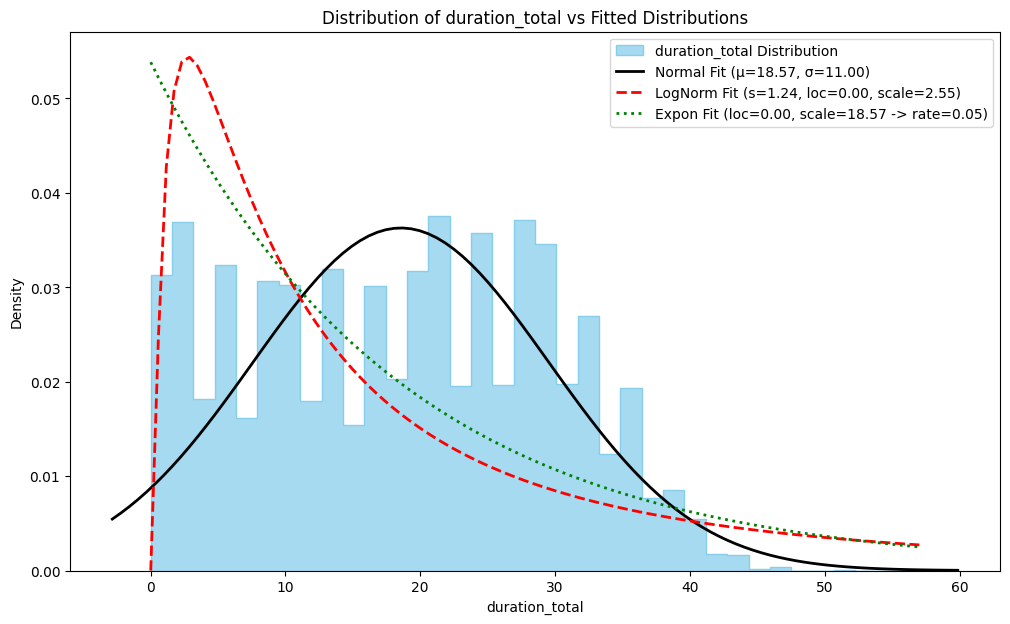

Discussion for duration_total:
  Data Mean: 18.57, Data Std Dev: 11.00
  Skewness: 0.04, Kurtosis: -1.04
  Normal Fit: Mean (μ)=18.57, Std Dev (σ)=11.00
  LogNormal Fit: Shape (s)=1.24, Loc=0.00, Scale (exp(mu))=12.75 (mu_log=2.55, sigma_log=1.24)
  Exponential Fit: Loc=0.00, Scale (1/λ)=18.57 (Rate (λ)=0.05)
  Observations: Compare the histogram to Normal, Log-Normal, and Exponential distributions. Note skewness, presence of zeros/negatives, and how well each curve fits.
----------------------------------------------------------------------


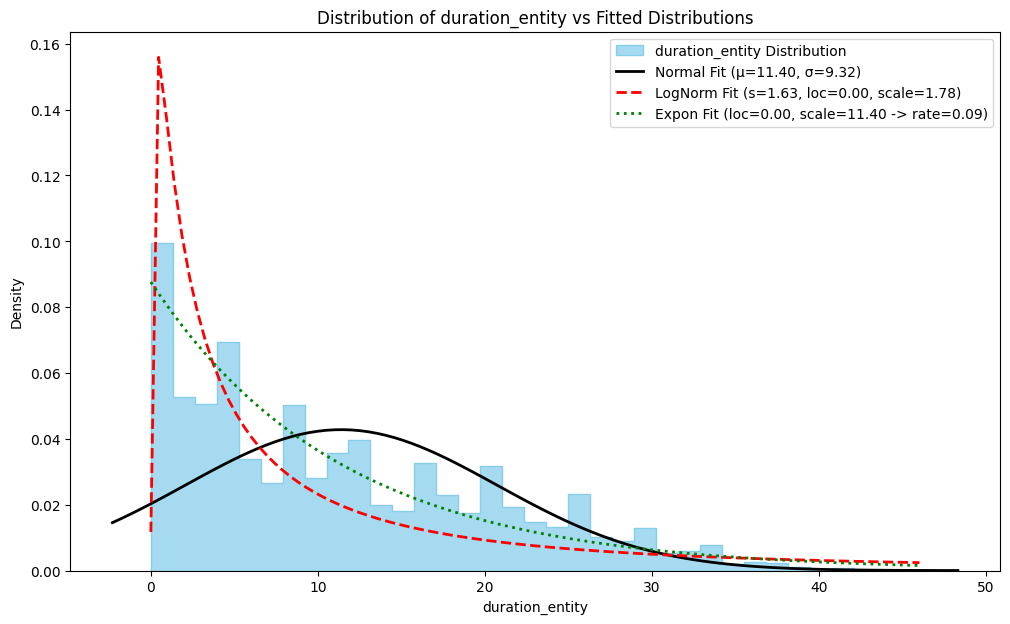

Discussion for duration_entity:
  Data Mean: 11.40, Data Std Dev: 9.32
  Skewness: 0.75, Kurtosis: -0.29
  Normal Fit: Mean (μ)=11.40, Std Dev (σ)=9.32
  LogNormal Fit: Shape (s)=1.63, Loc=0.00, Scale (exp(mu))=5.92 (mu_log=1.78, sigma_log=1.63)
  Exponential Fit: Loc=0.00, Scale (1/λ)=11.40 (Rate (λ)=0.09)
  Observations: Compare the histogram to Normal, Log-Normal, and Exponential distributions. Note skewness, presence of zeros/negatives, and how well each curve fits.
----------------------------------------------------------------------


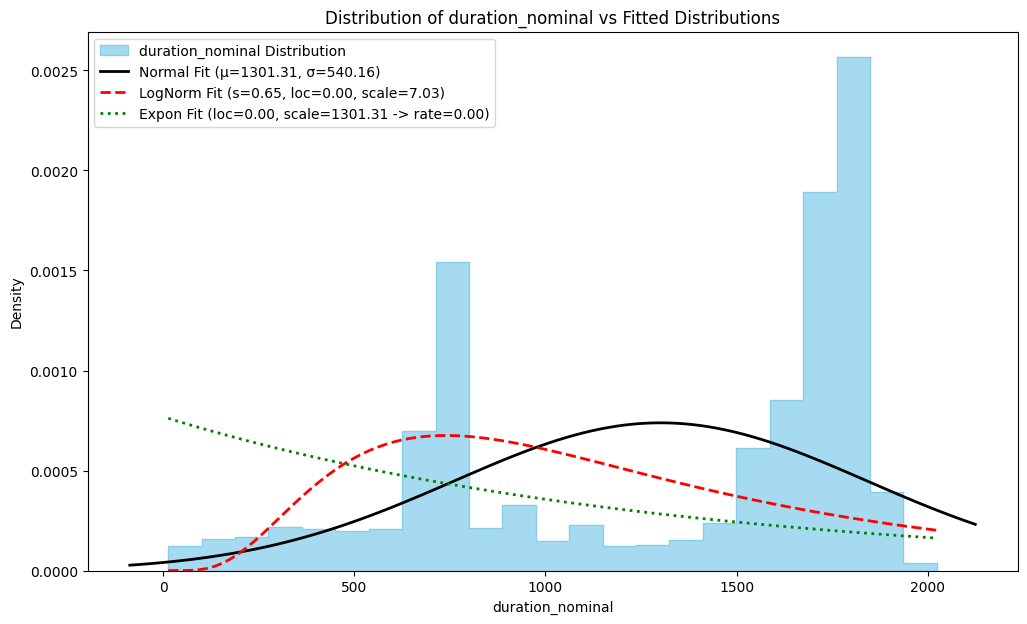

Discussion for duration_nominal:
  Data Mean: 1301.31, Data Std Dev: 540.19
  Skewness: -0.61, Kurtosis: -1.11
  Normal Fit: Mean (μ)=1301.31, Std Dev (σ)=540.16
  LogNormal Fit: Shape (s)=0.65, Loc=0.00, Scale (exp(mu))=1124.50 (mu_log=7.03, sigma_log=0.65)
  Exponential Fit: Loc=0.00, Scale (1/λ)=1301.31 (Rate (λ)=0.00)
  Observations: Compare the histogram to Normal, Log-Normal, and Exponential distributions. Note skewness, presence of zeros/negatives, and how well each curve fits.
----------------------------------------------------------------------


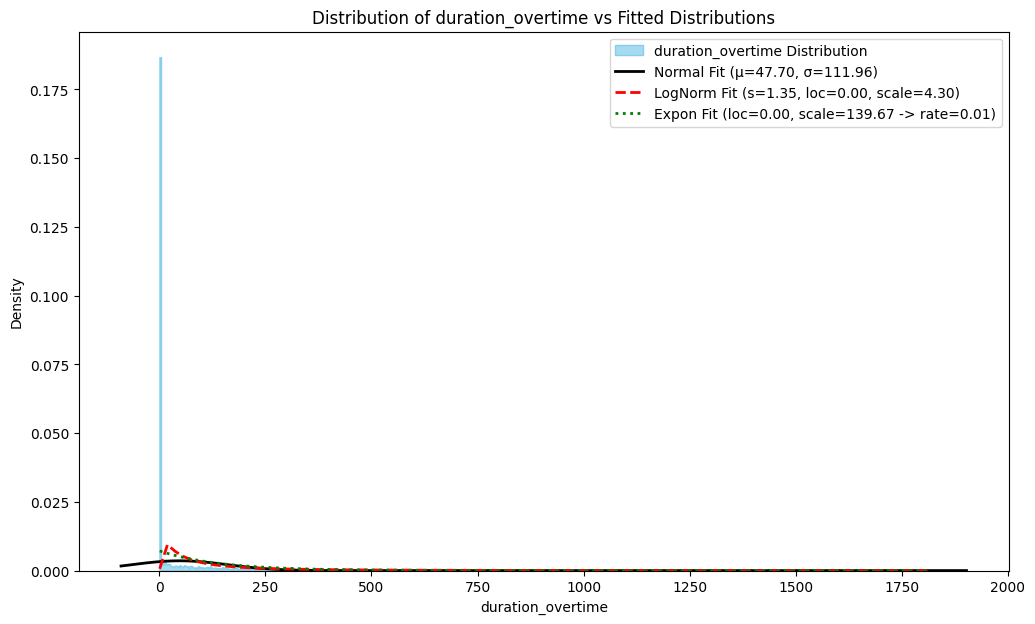

Discussion for duration_overtime:
  Data Mean: 47.70, Data Std Dev: 111.96
  Skewness: 4.81, Kurtosis: 38.71
  Normal Fit: Mean (μ)=47.70, Std Dev (σ)=111.96
  LogNormal Fit: Shape (s)=1.35, Loc=0.00, Scale (exp(mu))=73.93 (mu_log=4.30, sigma_log=1.35)
  Exponential Fit: Loc=0.00, Scale (1/λ)=139.67 (Rate (λ)=0.01)
  Observations: Compare the histogram to Normal, Log-Normal, and Exponential distributions. Note skewness, presence of zeros/negatives, and how well each curve fits.
----------------------------------------------------------------------


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon
import numpy as np

# Quantitative columns were previously defined as:
# quantitative_cols = ['base', 'bonus', 'overtime_pay', 'other', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
# We will use this list. Ensure df is loaded and quantitative_cols is defined.

if 'df' not in locals():
    print("DataFrame 'df' not found. Please ensure it is loaded correctly.")
elif 'quantitative_cols' not in locals():
    print("List 'quantitative_cols' not found. Please ensure it is defined.")
else:
    for col in quantitative_cols:
        plt.figure(figsize=(12, 7))
        
        # Plot histogram of the original data for density
        sns.histplot(df[col].dropna(), kde=False, stat="density", label=f'{col} Distribution', color='skyblue', element="step")
        
        # --- Normal Distribution Fit ---
        data_normal_fit = df[col].dropna()
        if not data_normal_fit.empty:
            mu_norm, std_norm = norm.fit(data_normal_fit)
            xmin, xmax = plt.xlim()
            x_norm = np.linspace(xmin, xmax, 100)
            p_norm = norm.pdf(x_norm, mu_norm, std_norm)
            plt.plot(x_norm, p_norm, 'k', linewidth=2, label=f'Normal Fit (\u03BC={mu_norm:.2f}, \u03C3={std_norm:.2f})')
        else:
            mu_norm, std_norm = np.nan, np.nan
            print(f"Skipping Normal fit for {col} due to no data after dropna.")
        
        # Data for distributions requiring positive values
        data_positive_fit = df[col][df[col] > 0].dropna()
        
        # --- Log-Normal Distribution Fit ---
        if not data_positive_fit.empty:
            try:
                shape_ln, loc_ln, scale_ln = lognorm.fit(data_positive_fit, floc=0) # floc=0 to fix location for some datasets
                x_ln = np.linspace(data_positive_fit.min(), data_positive_fit.max(), 100)
                p_ln = lognorm.pdf(x_ln, shape_ln, loc=loc_ln, scale=scale_ln)
                plt.plot(x_ln, p_ln, 'r--', linewidth=2, label=f'LogNorm Fit (s={shape_ln:.2f}, loc={loc_ln:.2f}, scale={np.log(scale_ln):.2f})')
            except Exception as e:
                print(f"Could not fit Log-Normal for {col}: {e}")
                shape_ln, loc_ln, scale_ln = np.nan, np.nan, np.nan
        else:
            print(f"Skipping Log-Normal fit for {col} due to no positive data after dropna.")
            shape_ln, loc_ln, scale_ln = np.nan, np.nan, np.nan
            
        # --- Exponential Distribution Fit ---
        if not data_positive_fit.empty:
            try:
                loc_exp, scale_exp = expon.fit(data_positive_fit, floc=0) # floc=0 to fix location
                x_exp = np.linspace(data_positive_fit.min(), data_positive_fit.max(), 100)
                p_exp = expon.pdf(x_exp, loc=loc_exp, scale=scale_exp)
                plt.plot(x_exp, p_exp, 'g:', linewidth=2, label=f'Expon Fit (loc={loc_exp:.2f}, scale={scale_exp:.2f} -> rate={1/scale_exp:.2f})')
            except Exception as e:
                print(f"Could not fit Exponential for {col}: {e}")
                loc_exp, scale_exp = np.nan, np.nan
        else:
            print(f"Skipping Exponential fit for {col} due to no positive data after dropna.")
            loc_exp, scale_exp = np.nan, np.nan
        
        title = f"Distribution of {col} vs Fitted Distributions"
        plt.title(title)
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.legend()
        plt.show()
        
        print(f"Discussion for {col}:")
        print(f"  Data Mean: {df[col].mean():.2f}, Data Std Dev: {df[col].std():.2f}\n  Skewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurtosis():.2f}")
        if not np.isnan(mu_norm): print(f"  Normal Fit: Mean (\u03BC)={mu_norm:.2f}, Std Dev (\u03C3)={std_norm:.2f}")
        if not np.isnan(shape_ln): print(f"  LogNormal Fit: Shape (s)={shape_ln:.2f}, Loc={loc_ln:.2f}, Scale (exp(mu))={scale_ln:.2f} (mu_log={np.log(scale_ln):.2f}, sigma_log={shape_ln:.2f})")
        if not np.isnan(loc_exp): print(f"  Exponential Fit: Loc={loc_exp:.2f}, Scale (1/\u03BB)={scale_exp:.2f} (Rate (\u03BB)={1/scale_exp if scale_exp > 0 else np.nan:.2f})")
        print("  Observations: Compare the histogram to Normal, Log-Normal, and Exponential distributions. Note skewness, presence of zeros/negatives, and how well each curve fits.")
        print("-"*70)

### TASK 2

## Task 2: Clustering Analysis - Approach and Justification

This section details the methodology employed for the clustering analysis in Task 2. The goal is to explore natural groupings within the employee dataset based on their characteristics.

### 1. Variable Selection

The clustering analysis utilizes both quantitative and qualitative features available in the dataset. These features were identified during the initial data exploration (Task 1) and are assumed to be defined in the `quantitative_cols` and `qualitative_cols` lists:

- **Quantitative Features**: `base`, `bonus`, `overtime_pay`, `other`, `age`, `duration_total`, `duration_entity`, `duration_nominal`, `duration_overtime`. These variables provide numerical measures of compensation and tenure.
- **Qualitative Features**: `sector`, `section_07`, `sex`, `education`, `contract`. These variables provide categorical information about the employees and their employment context.

**Justification**: Including a mix of quantitative and qualitative features provides a comprehensive view of each employee, allowing for richer and more nuanced cluster definitions. The aim is to identify groups based on a holistic set of attributes.

### 2. Data Preprocessing

To prepare the data for the KMeans clustering algorithm, the following transformations were applied:

   - **Qualitative Feature Encoding (Label Encoding)**:
     - **Method**: Each categorical feature in `qualitative_cols` was converted into numerical representation using `sklearn.preprocessing.LabelEncoder`.
     - **Justification**: KMeans requires all input features to be numerical. Label Encoding assigns a unique integer to each category within a feature. While this method can introduce an artificial ordinal relationship, it's a straightforward approach for converting categorical data for algorithms like KMeans, especially when the number of features is moderate. For this exploratory analysis, it serves as an initial step.

   - **Quantitative Feature Scaling (Standard Scaling)**:
     - **Method**: Each numerical feature in `quantitative_cols` was scaled using `sklearn.preprocessing.StandardScaler`. This transforms the data to have a mean of 0 and a standard deviation of 1.
     - **Justification**: KMeans clustering is sensitive to the scale of the input features because it relies on distance calculations (typically Euclidean). Features with larger values or variances can disproportionately influence the clustering outcome. Standard Scaling ensures that all quantitative features contribute more equally to the distance computations, preventing any single feature from dominating the clustering process due to its scale.

### 3. Clustering Algorithm and Distance Measure

   - **Algorithm**: KMeans clustering (`sklearn.cluster.KMeans`).
     - **Justification**: KMeans is a widely-used, efficient, and intuitive partitioning algorithm. It aims to group data points into a pre-defined number of clusters (K) such that each data point belongs to the cluster with the nearest mean (centroid). It's well-suited for exploratory analysis to discover underlying group structures in the data.

   - **Distance Measure**: Euclidean Distance.
     - **Justification**: KMeans, by default in scikit-learn, uses Euclidean distance to measure the similarity between data points and cluster centroids. This is a standard and geometrically intuitive metric for continuous data or appropriately transformed categorical data in a multi-dimensional space.

### 4. Determining the Optimal Number of Clusters (K)

   - **Method**: The Silhouette Score.
     - **Justification**: The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where higher values indicate better-defined clusters. By calculating the average silhouette score for a range of K values, we can identify the optimal number of clusters that maximizes this score.

### 5. Visualization

   - **Method**: Principal Component Analysis (PCA).
     - **Justification**: To visualize the clusters in a 2D space, PCA was used to reduce the dimensionality of the (processed) feature space to two principal components. This allows for a scatter plot where each point is colored by its assigned cluster label, providing a visual assessment of cluster separation and structure.

Applying Label Encoding to qualitative features for clustering...
Qualitative features label encoded for clustering.

Applying Standard Scaling to quantitative features for clustering...
Quantitative features scaled for clustering.

Determining optimal K for KMeans using Silhouette Score...
For K=2, average silhouette score: 0.2080
For K=2, average silhouette score: 0.2080
For K=3, average silhouette score: 0.2293
For K=3, average silhouette score: 0.2293
For K=4, average silhouette score: 0.2340
For K=4, average silhouette score: 0.2340
For K=5, average silhouette score: 0.2363
For K=5, average silhouette score: 0.2363
For K=6, average silhouette score: 0.2339
For K=6, average silhouette score: 0.2339
For K=7, average silhouette score: 0.2159
For K=7, average silhouette score: 0.2159
For K=8, average silhouette score: 0.1888
For K=8, average silhouette score: 0.1888
For K=9, average silhouette score: 0.1787
For K=9, average silhouette score: 0.1787
For K=10, average silhouette score: 

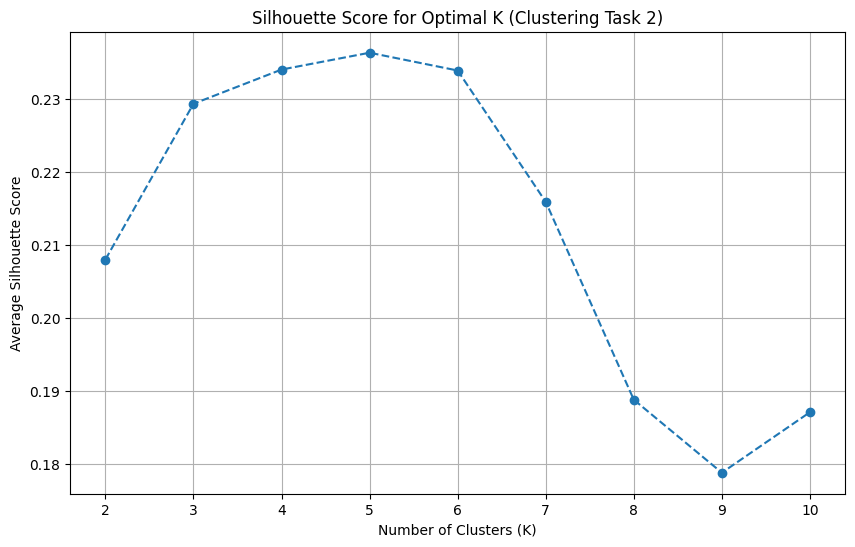


Optimal K based on highest silhouette score: 5 (Score: 0.2363)

Performing KMeans clustering with K=5...
KMeans clustering completed. Cluster labels added to 'df_cluster' as 'cluster_label'.

Cluster distribution:
cluster_label
0    3325
1    4120
2    3451
3      77
4      27
Name: count, dtype: int64

Visualizing clusters using PCA...


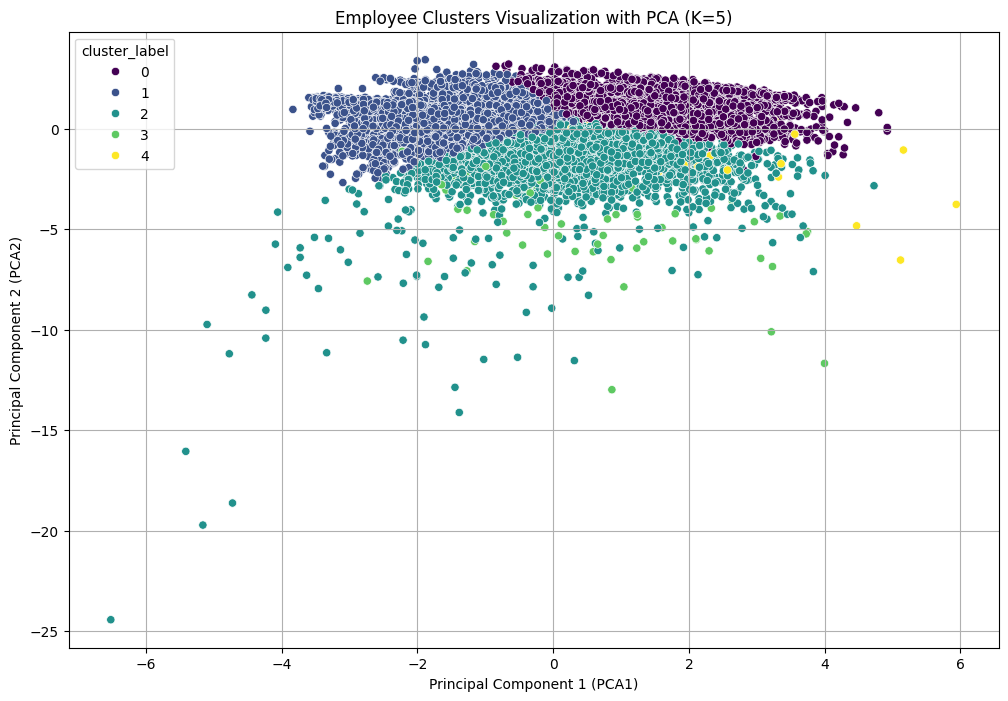

Cluster visualization with PCA displayed.

DataFrame 'df_cluster' with cluster assignments and PCA components (first 5 rows):
       id      base   bonus  sector  section_07  cluster_label  pca1_cluster  \
0  192064  26651.53     0.0       1           3              0      1.449497   
1   25495  40168.50  1500.0       1           2              1     -1.366636   
2  142164  20134.80     0.0       1           2              0      1.996496   
3  198034  16475.00     0.0       1           2              0      2.503552   
4  144990  34797.60     0.0       1           2              2      0.400364   

   pca2_cluster  
0      1.132675  
1     -0.305281  
2      0.864557  
3      1.469629  
4     -1.040569  

Example: Mean values of quantitative features for each cluster (using original unscaled data for interpretability):
                       base         bonus  overtime_pay         other  \
cluster_label                                                           
0              26513.9

In [65]:
# Task 2: Clustering Analysis
# Ensure df, quantitative_cols, and qualitative_cols are available from previous cells.

# 0. Make a copy of the dataframe for clustering
df_cluster = df.copy()

# 1. Define features for clustering
# Using quantitative_cols and qualitative_cols assumed to be defined in a previous cell (e.g., e53c3266)
features_for_clustering = quantitative_cols + qualitative_cols
X_cluster_data = df_cluster[features_for_clustering]

# 2. Preprocessing
# Create a copy of X_cluster_data to avoid SettingWithCopyWarning for label encoding
X_processed_cluster = X_cluster_data.copy()

# a. Label Encode qualitative features
label_encoders_for_cluster = {}
print("Applying Label Encoding to qualitative features for clustering...")
for col in qualitative_cols:
    if col in X_processed_cluster.columns:
        le_cluster = LabelEncoder()
        X_processed_cluster[col] = le_cluster.fit_transform(X_processed_cluster[col])
        label_encoders_for_cluster[col] = le_cluster
    else:
        print(f"Warning: Qualitative column '{col}' not found in X_processed_cluster during Label Encoding.")
print("Qualitative features label encoded for clustering.")

# b. Scale quantitative features
print("\nApplying Standard Scaling to quantitative features for clustering...")
scaler_for_cluster = StandardScaler()
# Ensure only existing quantitative columns are scaled
existing_quantitative_cols_cluster = [col for col in quantitative_cols if col in X_processed_cluster.columns]
if existing_quantitative_cols_cluster:
    X_processed_cluster[existing_quantitative_cols_cluster] = scaler_for_cluster.fit_transform(X_processed_cluster[existing_quantitative_cols_cluster])
    print("Quantitative features scaled for clustering.")
else:
    print("Warning: No quantitative columns found or specified for scaling in clustering task.")

# 3. Determine optimal number of clusters using the Silhouette Score
print("\nDetermining optimal K for KMeans using Silhouette Score...")
silhouette_scores_cluster = []
# K range must start from 2 for silhouette score calculation, as silhouette score is not defined for K=1.
k_range_silhouette = range(2, 11) # Test K from 2 to 10

if not X_processed_cluster.empty and len(X_processed_cluster) > 1: # Silhouette score requires at least 2 samples
    for k_val_silhouette in k_range_silhouette:
        kmeans_model_temp = KMeans(n_clusters=k_val_silhouette, random_state=42, n_init='auto')
        # Ensure X_processed_cluster has enough unique data points for the number of clusters
        # This check is a bit simplified; more robust checks might be needed for edge cases
        if len(np.unique(X_processed_cluster, axis=0)) >= k_val_silhouette:
            try:
                cluster_labels_temp = kmeans_model_temp.fit_predict(X_processed_cluster)
                # Silhouette score requires at least 2 distinct cluster labels if n_clusters > 1
                if len(np.unique(cluster_labels_temp)) > 1:
                    silhouette_avg = silhouette_score(X_processed_cluster, cluster_labels_temp)
                    silhouette_scores_cluster.append(silhouette_avg)
                    print(f"For K={k_val_silhouette}, average silhouette score: {silhouette_avg:.4f}")
                else:
                    print(f"For K={k_val_silhouette}, only one cluster was formed. Silhouette score cannot be computed. Appending NaN.")
                    silhouette_scores_cluster.append(np.nan) # Or handle as appropriate
            except ValueError as e:
                print(f"Could not compute silhouette score for K={k_val_silhouette}: {e}. Appending NaN.")
                silhouette_scores_cluster.append(np.nan)
        else:
            print(f"Not enough unique samples for K={k_val_silhouette}. Skipping silhouette score calculation. Appending NaN.")
            silhouette_scores_cluster.append(np.nan)

    # Plot the Silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(k_range_silhouette, silhouette_scores_cluster, marker='o', linestyle='--')
    plt.title('Silhouette Score for Optimal K (Clustering Task 2)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Average Silhouette Score')
    plt.xticks(k_range_silhouette)
    plt.grid(True)
    plt.show()

    # Choose K with the highest silhouette score (ignoring NaNs)
    valid_scores = [s for s in silhouette_scores_cluster if not np.isnan(s)]
    if valid_scores: 
        max_silhouette_score = max(valid_scores)
        # Find the first K that achieves this max score
        optimal_k_cluster = k_range_silhouette[silhouette_scores_cluster.index(max_silhouette_score)]
        print(f"\nOptimal K based on highest silhouette score: {optimal_k_cluster} (Score: {max_silhouette_score:.4f})")
    else:
        print("\nCould not determine optimal K using silhouette score from the tested range. Defaulting to K=3.")
        optimal_k_cluster = 3 # Fallback K
else:
    print("\nSkipping silhouette score calculation as X_processed_cluster is empty or has too few samples. Defaulting to K=3.")
    optimal_k_cluster = 3 # Fallback K

# 4. Perform KMeans clustering with chosen K
# IMPORTANT: optimal_k_cluster is now determined by silhouette score
print(f"\nPerforming KMeans clustering with K={optimal_k_cluster}...")
final_kmeans_model = KMeans(n_clusters=optimal_k_cluster, random_state=42, n_init='auto')
df_cluster['cluster_label'] = final_kmeans_model.fit_predict(X_processed_cluster)
print(f"KMeans clustering completed. Cluster labels added to 'df_cluster' as 'cluster_label'.")

# 5. Display cluster counts
print("\nCluster distribution:")
print(df_cluster['cluster_label'].value_counts().sort_index())

# 6. Visualize clusters using PCA (Principal Component Analysis)
print("\nVisualizing clusters using PCA...")
pca_for_cluster = PCA(n_components=2, random_state=42)
X_pca_transformed_cluster = pca_for_cluster.fit_transform(X_processed_cluster)
df_cluster['pca1_cluster'] = X_pca_transformed_cluster[:, 0]
df_cluster['pca2_cluster'] = X_pca_transformed_cluster[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca1_cluster', y='pca2_cluster', hue='cluster_label', data=df_cluster, palette='viridis', legend='full')
plt.title(f'Employee Clusters Visualization with PCA (K={optimal_k_cluster})')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.grid(True)
plt.show()
print("Cluster visualization with PCA displayed.")

# Display the first few rows with cluster assignments and PCA components
print("\nDataFrame 'df_cluster' with cluster assignments and PCA components (first 5 rows):")
# Select a subset of columns for concise display
display_cols_cluster = ['id'] 
if existing_quantitative_cols_cluster:
    display_cols_cluster += existing_quantitative_cols_cluster[:2] # Show first 2 quantitative
if qualitative_cols:
    display_cols_cluster += qualitative_cols[:2] # Show first 2 qualitative
display_cols_cluster += ['cluster_label', 'pca1_cluster', 'pca2_cluster']
# Ensure all display_cols exist in df_cluster to prevent errors
display_cols_cluster = [col for col in display_cols_cluster if col in df_cluster.columns]
print(df_cluster[display_cols_cluster].head())

# Further analysis could involve examining the characteristics of each cluster
print("\nExample: Mean values of quantitative features for each cluster (using original unscaled data for interpretability):")
# For interpretability, group original data by cluster label and calculate means
df_cluster_original_means = df.copy() # Start with original data
df_cluster_original_means['cluster_label'] = df_cluster['cluster_label'] # Add cluster labels

if existing_quantitative_cols_cluster:
    cluster_means_original_scale = df_cluster_original_means.groupby('cluster_label')[existing_quantitative_cols_cluster].mean()
    print(cluster_means_original_scale)
else:
    print("No quantitative features were specified for clustering, skipping mean value display.")

print("\nTask 2 Clustering Analysis complete.")

### TASK 3

In [51]:
# --- Task 3: Data Preparation for Classification Models ---
# Ensure df is loaded from 'earnings.csv' (from Task 1)
# Required imports: pandas, numpy, ColumnTransformer, StandardScaler, OneHotEncoder, train_test_split

df_task3 = df.copy() # Work on a copy

# 1. Create the target variable 'has_higher_education'
df_task3['has_higher_education'] = (df_task3['education'] <= 2).astype(int)

# 2. Define features (X) and target (y)
# Numerical features (excluding 'education' as it forms the target)
numerical_features = ['age', 'base', 'bonus', 'overtime_pay', 'other', 
                    'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
# Categorical features (excluding 'education')
categorical_features = ['sector', 'section_07', 'sex', 'contract']

# Ensure all specified features exist in the DataFrame
all_expected_features = numerical_features + categorical_features
existing_cols_in_df = df_task3.columns.tolist()

# Filter features to only those present in the DataFrame to avoid errors
numerical_features = [col for col in numerical_features if col in existing_cols_in_df]
categorical_features = [col for col in categorical_features if col in existing_cols_in_df]

if not (numerical_features + categorical_features):
    raise ValueError("No features selected or available in the DataFrame. Check feature lists and df columns.")

X = df_task3[numerical_features + categorical_features]
y = df_task3['has_higher_education']

# 3. Create a preprocessor object using ColumnTransformer
transformers = []
if numerical_features:
    transformers.append(('num', StandardScaler(), numerical_features))
if categorical_features:
    # handle_unknown='ignore' will prevent errors if new categories appear in test data
    transformers.append(('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features))

if not transformers:
    raise ValueError("No transformers defined. Ensure numerical_features or categorical_features lists are populated.")
    
preprocessor = ColumnTransformer(transformers=transformers, remainder='drop')

# 4. Split data into training and testing sets
# stratify=y is good for classification tasks to maintain class proportion in splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 5. Apply preprocessing
# Fit the preprocessor on the training data and transform both training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Data preparation for Task 3 classification models complete.")
print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")
print("y_train distribution:")
print(f"{y_train.value_counts(normalize=True)}")
print("y_test distribution:")
print(f"{y_test.value_counts(normalize=True)}")

Data preparation for Task 3 classification models complete.
X_train_processed shape: (7700, 18)
X_test_processed shape: (3300, 18)
y_train distribution:
has_higher_education
1    0.642078
0    0.357922
Name: proportion, dtype: float64
y_test distribution:
has_higher_education
1    0.642121
0    0.357879
Name: proportion, dtype: float64


In [52]:
# --- Logistic Regression Model ---
# X_train_processed, y_train, X_test_processed, y_test should be available from Task 3 data preparation

print("\n--- Logistic Regression Results ---")

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test_processed)

# Evaluate the model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
log_reg_class_report = classification_report(y_test, y_pred_log_reg, zero_division=0)

print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
print("\nLogistic Regression Confusion Matrix:")
print(log_reg_conf_matrix)
print("\nLogistic Regression Classification Report:")
print(log_reg_class_report)

# Print unique values in y_test and y_pred_log_reg to understand the report better
print(f"\nUnique values in y_test: {np.unique(y_test)}")
print(f"Unique values in y_pred_log_reg: {np.unique(y_pred_log_reg)}")


--- Logistic Regression Results ---
Logistic Regression Accuracy: 0.8582

Logistic Regression Confusion Matrix:
[[ 944  237]
 [ 231 1888]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1181
           1       0.89      0.89      0.89      2119

    accuracy                           0.86      3300
   macro avg       0.85      0.85      0.85      3300
weighted avg       0.86      0.86      0.86      3300


Unique values in y_test: [0 1]
Unique values in y_pred_log_reg: [0 1]


### Assessing Logistic Regression Model Quality with Cross-Validation

To get a more reliable estimate of the Logistic Regression model's performance on unseen data, we use k-fold cross-validation. This technique helps to mitigate issues like overfitting to a specific train-test split and provides a more robust measure of generalization.

**Methodology:**

1.  **Pipeline:** A pipeline was constructed combining the same preprocessing steps (Standard Scaling for numerical features, One-Hot Encoding for categorical features) and the Logistic Regression model. This ensures that preprocessing is applied correctly and independently within each fold of the cross-validation, preventing data leakage.
2.  **Data:** The cross-validation was performed on the original training set (`X_train`, `y_train`).
3.  **K-Fold Strategy:** We used Stratified K-Fold with 5 splits (`StratifiedKFold(n_splits=5, shuffle=True, random_state=42)`). Stratification ensures that each fold maintains approximately the same percentage of samples of each target class as the complete set, which is important for classification tasks, especially with imbalanced datasets.
4.  **Metrics:** The model was evaluated using Accuracy, Weighted Precision, Weighted Recall, and Weighted F1-Score.

**Interpretation of Results:**

The output from the cross-validation provides the mean and standard deviation for each metric across the 5 folds:

*   **Mean:** The average performance for that metric. This is our primary estimate of how the model is expected to perform on unseen data.
*   **Standard Deviation (Std):** This indicates the variability of the metric. A smaller standard deviation suggests consistent performance across different data subsets.

These cross-validated scores are generally a better indicator of the model's true predictive power on new data than scores from a single train-test split.

In [53]:
# --- Linear Discriminant Analysis (LDA) Model ---
# X_train_processed, y_train, X_test_processed, y_test are from Task 3 data preparation

print("\n--- Linear Discriminant Analysis (LDA) Results ---")

# Initialize and train the LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred_lda = lda_model.predict(X_test_processed)

# Evaluate the model
lda_accuracy = accuracy_score(y_test, y_pred_lda)
lda_conf_matrix = confusion_matrix(y_test, y_pred_lda)
lda_class_report = classification_report(y_test, y_pred_lda, zero_division=0)

print(f"LDA Accuracy: {lda_accuracy:.4f}")
print("\nLDA Confusion Matrix:")
print(lda_conf_matrix)
print("\nLDA Classification Report:")
print(lda_class_report)

print(f"\nUnique values in y_test: {np.unique(y_test)}")
print(f"Unique values in y_pred_lda: {np.unique(y_pred_lda)}")


--- Linear Discriminant Analysis (LDA) Results ---
LDA Accuracy: 0.8482

LDA Confusion Matrix:
[[ 947  234]
 [ 267 1852]]

LDA Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1181
           1       0.89      0.87      0.88      2119

    accuracy                           0.85      3300
   macro avg       0.83      0.84      0.84      3300
weighted avg       0.85      0.85      0.85      3300


Unique values in y_test: [0 1]
Unique values in y_pred_lda: [0 1]


### Assessing LDA Model Quality with Cross-Validation\n
\n
To get a more reliable estimate of the Linear Discriminant Analysis (LDA) model's performance on unseen data, we use k-fold cross-validation. This technique helps to mitigate issues like overfitting to a specific train-test split and provides a more robust measure of generalization.\n
\n
**Methodology:**\n
\n
1.  **Pipeline:** A pipeline was constructed combining the same preprocessing steps (Standard Scaling for numerical features, One-Hot Encoding for categorical features) and the LDA model. This ensures that preprocessing is applied correctly and independently within each fold of the cross-validation, preventing data leakage.\n
2.  **Data:** The cross-validation was performed on the original training set (`X_train`, `y_train`).\n
3.  **K-Fold Strategy:** We used Stratified K-Fold with 5 splits (`StratifiedKFold(n_splits=5, shuffle=True, random_state=42)`). Stratification ensures that each fold maintains approximately the same percentage of samples of each target class as the complete set, which is important for classification tasks, especially with imbalanced datasets.\n
4.  **Metrics:** The model was evaluated using Accuracy, Weighted Precision, Weighted Recall, and Weighted F1-Score.\n
\n
**Interpretation of Results:**\n
\n
The output from the cross-validation provides the mean and standard deviation for each metric across the 5 folds:\n
\n
*   **Mean:** The average performance for that metric. This is our primary estimate of how the LDA model is expected to perform on unseen data.\n
*   **Standard Deviation (Std):** This indicates the variability of the metric. A smaller standard deviation suggests consistent performance across different data subsets.\n
\n
These cross-validated scores are generally a better indicator of the model's true predictive power on new data than scores from a single train-test split.

### Assessing QDA Model Quality with Cross-Validation\n
\n
To obtain a more robust evaluation of the Quadratic Discriminant Analysis (QDA) model's performance and its ability to generalize to unseen data, we employ k-fold cross-validation.\n
\n
**Methodology:**\n
\n
1.  **Pipeline:** A pipeline was created, integrating the same preprocessing steps used for other models (Standard Scaling for numerical features, One-Hot Encoding for categorical features) with the QDA classifier. This ensures that preprocessing is applied consistently and independently within each fold, preventing data leakage from the validation set into the training process of that fold.\n
2.  **Data:** The cross-validation was performed on the original training dataset (`X_train`, `y_train`).\n
3.  **K-Fold Strategy:** We utilized Stratified K-Fold with 5 splits (`StratifiedKFold(n_splits=5, shuffle=True, random_state=42)`). Stratification ensures that each fold reflects the class distribution of the original dataset, which is crucial for reliable classification model evaluation, particularly with imbalanced classes.\n
4.  **Metrics:** The QDA model was evaluated using key classification metrics: Accuracy, Weighted Precision, Weighted Recall, and Weighted F1-Score.\n
\n
**Interpretation of Results:**\n
\n
The cross-validation process yields the mean and standard deviation for each evaluation metric across the 5 folds:\n
\n
*   **Mean:** This represents the average performance of the QDA model for a given metric. It serves as our primary estimate of how the model is likely to perform on new, unseen data.\n
*   **Standard Deviation (Std):** This measures the variability or spread of the metric scores across the different folds. A lower standard deviation indicates more consistent performance, suggesting that the model is not overly sensitive to the specific subsets of data used for training and validation within the folds.\n
\n
These cross-validated scores provide a more dependable assessment of the QDA model's predictive capabilities compared to scores from a single train-test split, as they account for variability in data sampling.

In [54]:
# --- K-Nearest Neighbors (KNN) Model ---
# X_train_processed, y_train, X_test_processed, y_test are from Task 3 data preparation

print("\n--- K-Nearest Neighbors (KNN) Results ---")

# Initialize and train the KNN model (e.g., with k=5 neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_processed)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
knn_class_report = classification_report(y_test, y_pred_knn, zero_division=0)

print(f"KNN Accuracy (k=5): {knn_accuracy:.4f}")
print("\nKNN Confusion Matrix (k=5):")
print(knn_conf_matrix)
print("\nKNN Classification Report (k=5):")
print(knn_class_report)

print(f"\nUnique values in y_test: {np.unique(y_test)}")
print(f"Unique values in y_pred_knn: {np.unique(y_pred_knn)}")


--- K-Nearest Neighbors (KNN) Results ---
KNN Accuracy (k=5): 0.8512

KNN Confusion Matrix (k=5):
[[ 953  228]
 [ 263 1856]]

KNN Classification Report (k=5):
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1181
           1       0.89      0.88      0.88      2119

    accuracy                           0.85      3300
   macro avg       0.84      0.84      0.84      3300
weighted avg       0.85      0.85      0.85      3300


Unique values in y_test: [0 1]
Unique values in y_pred_knn: [0 1]


### Assessing QDA Model Quality with Cross-Validation\n
\n
To obtain a more robust evaluation of the Quadratic Discriminant Analysis (QDA) model's performance and its ability to generalize to unseen data, we employ k-fold cross-validation.\n
\n
**Methodology:**\n
\n
1.  **Pipeline:** A pipeline was created, integrating the same preprocessing steps used for other models (Standard Scaling for numerical features, One-Hot Encoding for categorical features) with the QDA classifier. This ensures that preprocessing is applied consistently and independently within each fold, preventing data leakage from the validation set into the training process of that fold.\n
2.  **Data:** The cross-validation was performed on the original training dataset (`X_train`, `y_train`).\n
3.  **K-Fold Strategy:** We utilized Stratified K-Fold with 5 splits (`StratifiedKFold(n_splits=5, shuffle=True, random_state=42)`). Stratification ensures that each fold reflects the class distribution of the original dataset, which is crucial for reliable classification model evaluation, particularly with imbalanced classes.\n
4.  **Metrics:** The QDA model was evaluated using key classification metrics: Accuracy, Weighted Precision, Weighted Recall, and Weighted F1-Score.\n
\n
**Interpretation of Results:**\n
\n
The cross-validation process yields the mean and standard deviation for each evaluation metric across the 5 folds:\n
\n
*   **Mean:** This represents the average performance of the QDA model for a given metric. It serves as our primary estimate of how the model is likely to perform on new, unseen data.\n
*   **Standard Deviation (Std):** This measures the variability or spread of the metric scores across the different folds. A lower standard deviation indicates more consistent performance, suggesting that the model is not overly sensitive to the specific subsets of data used for training and validation within the folds.\n
\n
These cross-validated scores provide a more dependable assessment of the QDA model's predictive capabilities compared to scores from a single train-test split, as they account for variability in data sampling.